<a href="https://colab.research.google.com/github/credwood/SportsBot/blob/master/Sportsbot_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/My Drive/projects/SportsBot/

In [ ]:
! pip install -r requirements.txt

In [ ]:
from sportsbot.finetune import train, tokenize_data, pil_grid, autolabel

In [ ]:
cd /content/drive/My Drive/projects

In [ ]:
import json
from sportsbot.datasets import read_data

label_dict = {"all_values": {
                  1: " No", 
                  2: " Remote", 
                  3: " Unsure", 
                  4: " Probably", 
                  5: " Yes", 
                  6: " Neutral", 
                  7: " None",
                  8: " Positive",
                  9: " Defensive",
                  10: " Negative",
                  11: " Opposition",
                  12: " Discussion",
                  13: " Agreement"
              },
              "bucketed_labels":{
                  1: [" No", " Remote"],
                  2: [" No", " Remote"], 
                  3: [" Unsure"], 
                  4: [" Probably", " Yes"],
                  5: [" Probably"," Yes"] ,
                  6: [" Neutral", " None"],
                  7: [" None", " Neutral"],
                  8: [" Positive"],
                  9: [" Defensive"],
                  10: [" Negative"],
                  11: [" Opposition",],
                  12: [" Discussion"],
                  13: [" Agreement"],
                  
              },
              "baseline_accuracy": 0.333
}

conv_objs = []
#conv_objs += read_data('data/multi_labeled_split_datasets/labeled_question_1_train.jsonl')
conv_objs += read_data('data/multi_labeled_split_datasets/labeled_question_2_train.jsonl')
#conv_objs += read_data('data/multi_labeled_split_datasets/labeled_question_3_train.jsonl')
#conv_objs += read_data('data/multi_labeled_split_datasets/labeled_question_4_train.jsonl')
#conv_objs += read_data('data/multi_labeled_split_datasets/labeled_question_5_train.jsonl')


In [ ]:
filtered_objs =[]
for conv in conv_objs:
  if conv.label[1] == 8 or conv.label[1] == 10 or conv.label[1] == 6:
    filtered_objs.append(conv)

In [ ]:
len(filtered_objs)

704

In [ ]:
templates = []
answers = []

In [ ]:
validate_objs = []
#validate_objs += read_data('data/multi_labeled_split_datasets/question_1_validate.jsonl')
validate_objs += read_data('data/multi_labeled_split_datasets/question_2_validate.jsonl')
#validate_objs += read_data('data/multi_labeled_split_datasets/question_3_validate.jsonl')
#validate_objs += read_data('data/multi_labeled_split_datasets/question_4_validate.jsonl')
#validate_objs += read_data('data/multi_labeled_split_datasets/question_5_validate.jsonl')
validate_objs[99].label = [3, 7, 12, 1, 1, ' the Lakers']

for conv in validate_objs:
  if conv.label[1] == 8 or conv.label[1] == 10 or conv.label[1] == 6:
    templates.append(conv)
    answers.append(conv.label[1])


In [ ]:
len(templates)

81

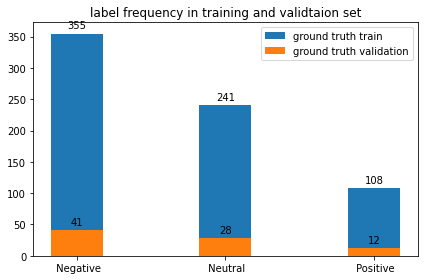

In [ ]:
%matplotlib notebook
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np



fig, ax = plt.subplots(tight_layout=True)
width = 0.35
ground_trth_train = [label_dict["all_values"][filtered_objs[index].label[1]] for index in range(len(filtered_objs))]
ground_trth_train = Counter(ground_trth_train)
labels = list(ground_trth_train.keys())
x_ax = np.arange(len(labels))
ground_trth_train = [ground_trth_train[val] for val in sorted(ground_trth_train.keys())]
bar_grph_train = ax.bar(x_ax, ground_trth_train, width, label='ground truth train')
ground_trth_test = [label_dict["all_values"][answers[index]] for index in range(len(answers))]
ground_trth_test = Counter(ground_trth_test)
ground_trth_test = [ground_trth_test[val] for val in sorted(ground_trth_test.keys())]
bar_grph_test = ax.bar(x_ax, ground_trth_test, width, label='ground truth validation')
ax.set_title("label frequency in training and validtaion set")
ax.set_xticks(x_ax)
ax.set_xticklabels(sorted(labels))

autolabel(bar_grph_train, ax)
autolabel(bar_grph_test, ax)
ax.legend()
plt.show()

# Validation statistics for Question 2, Fully balanced dataset

## Validation on Twitter conversations

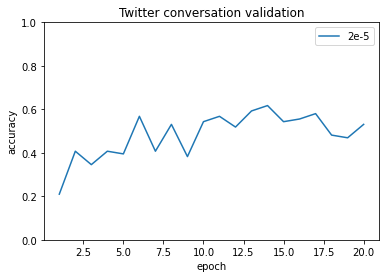

In [ ]:
%matplotlib notebook
%matplotlib inline
import torch
import matplotlib.pyplot as plt
import json

bal_twitt1 = []
bal_twitt2 = []
bal_twitt3 = []

for count in range(20):
  with open(f"Q2_medium_3label_fullyballanced_0.5_{count}", "r") as f:
        f = json.load(f)
        bal_twitt3.append(float(f["accuracy"]))
for count in range(20):
  with open(f"Q2_medium_3label_fullyballanced_1_{count}", "r") as f:
        f = json.load(f)
        bal_twitt1.append(float(f["accuracy"]))

x_ticks = [count for count in range(1,21)]
#line3 = plt.plot(x_ticks, bal_twitt3, label="1e-5")
line1 = plt.plot(x_ticks, bal_twitt1, label="2e-5")



plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.ylim([0,1])
plt.title("Twitter conversation validation")
plt.legend()
plt.show()

## Validation on Yelp-2

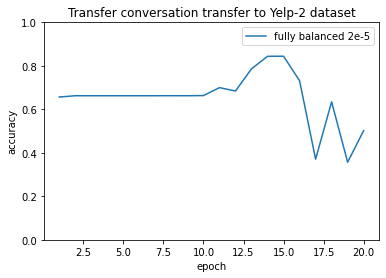

In [ ]:
%matplotlib notebook
%matplotlib inline
import torch
import matplotlib.pyplot as plt
import json

fully_balancedhalf = [0.06425, 0.64775, 0.6675000000000001, 0.6602499999999999, 0.6614999999999999, 0.6602500000000001, 0.665, 0.6537499999999999, 0.674, 0.6435, 0.65075, 0.6532499999999999, 0.65325, 0.65175, 0.6765000000000001, 0.6824166666666666, 0.6699122807017543, 0.62675, 0.75075, 0.406]
fully_balanced1 = [0.65575, 0.666, 0.65825, 0.6489999999999999, 0.6469999999999999, 0.6597500000000001, 0.6609999999999999, 0.6627500000000001, 0.663, 0.6499999999999999, 0.6864999999999999, 0.6844999999999999, 0.7785, 0.837, 0.8402499999999999, 0.73175, 0.3745, 0.64125, 0.36625, 0.507]
fully_balanced2 = [0.647, 0.65175, 0.67875, 0.6615, 0.65775, 0.6592499999999999, 0.6575, 0.6562500000000001, 0.6575, 0.6917500000000001, 0.6196566416040101, 0.4295, 0.5575, 0.32724999999999993, 0.12925, 0.17725, 0.3718527568922306, 0.1325, 0.123, 0.11574999999999999]
fully_balanced4 = [0.656, 0.6519999999999999, 0.6562500000000001, 0.6582500000000001, 0.6667500000000001, 0.6579210526315791, 0.6854999999999999, 0.46699999999999997, 0.11874999999999998, 0.47785087719298247, 0.20500000000000002, 0.21974999999999997, 0.20875, 0.14775, 0.708, 0.50925, 0.257, 0.29475, 0.1285, 0.17425] 

x_ticks = [count for count in range(1,21)]

static_set_lr1 = [0.6567142857142857,0.6625714285714286,0.6625714285714286,0.6625714285714286,0.6625714285714286,0.6625714285714286, 0.6625714285714286,0.6627142857142857,0.6625714285714286,0.6632857142857143,0.6997142857142857,0.6842857142857143,0.7864285714285715,0.8438571428571429,0.8442857142857143,0.7315714285714285,0.37085714285714283,0.6345714285714286,0.3568571428571429,0.5022857142857143]


#linehalf = plt.plot(x_ticks, fully_balancedhalf, label="fully balanced 1e-5")
line1 = plt.plot(x_ticks, static_set_lr1, label="fully balanced 2e-5")
#line2 = plt.plot(x_ticks, fully_balanced2, label="fully balanced 4e-5")
#line3 = plt.plot(x_ticks, fully_balanced4, label="fully balanced 8e-5")
#line4 = plt.plot(x_ticks, fully_balanced8, label="fully balanced 1.6e-4")
#line5 = plt.plot(x_ticks, fully_balanced16, label="fully balanced 3.2e-4")

#y_ax = np.arange(0,1,.1)
#plt.yticks(np.arange(0, 1, 0.1))
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.ylim([0,1])
plt.title("Transfer conversation transfer to Yelp-2 dataset")
plt.legend()
plt.show()

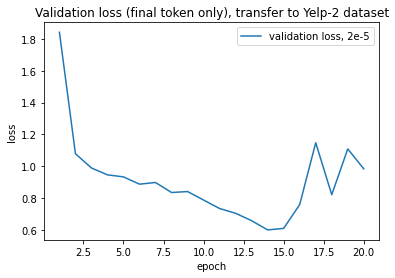

In [ ]:
%matplotlib notebook
%matplotlib inline
import torch
import matplotlib.pyplot as plt
import json


x_ticks = [count for count in range(1,21)]

# validation run in another notebook
validation_loss_1 = [
                      1.8424341059412275,
                      1.0788719791727406,
                      0.9891588068583181,
                      0.9460628600205694,
                      0.933302245914936,
                      0.8874929513548102,
                      0.8979686465944563,
                      0.8350769402916942,
                      0.8410576523244381,
                      0.7876396201401948,
                      0.734463564189417,
                      0.7043856098598668,
                      0.6578252632319928,
                      0.5999460702410766,
                      0.6096329773148256,
                      0.7594255358108453,
                      1.1478005450857538,
                      0.8212757987113936,
                      1.10904801548911,
                      0.983689018616985
]

linehalf = plt.plot(x_ticks, validation_loss_1, label="validation loss, 2e-5")
#line1 = plt.plot(x_ticks, static_set_lr1, label="validation loss, 1e-5")

plt.xlabel("epoch")
plt.ylabel("loss")
#plt.ylim([0,1])
plt.title("Validation loss (final token only), transfer to Yelp-2 dataset")
plt.legend()
plt.show()


# Fine-tuning code: Balanced Q2 labels

In [ ]:
import random

random.seed(5)

end = 355
pos_start = 108*3
neut_start = 241
temp_pos = []
temp_neut = []
temp_neg = []
train_objs = []
for conv in filtered_objs:
  if conv.label[1] == 8:
    temp_pos.append(conv)
  if conv.label[1] == 6:
    temp_neut.append(conv)
  if conv.label[1] == 10:
    temp_neg.append(conv)

temp_pos += temp_pos + temp_pos
temp_pos += random.sample(temp_pos, k=end-pos_start)
temp_neut += random.sample(temp_neut, k=end-neut_start)

train_objs += temp_pos + temp_neut + temp_neg
random.shuffle(train_objs)
len(train_objs)

1065

## Note: this code was last run with a learning rate that is far too large; the loss graph reflects this.

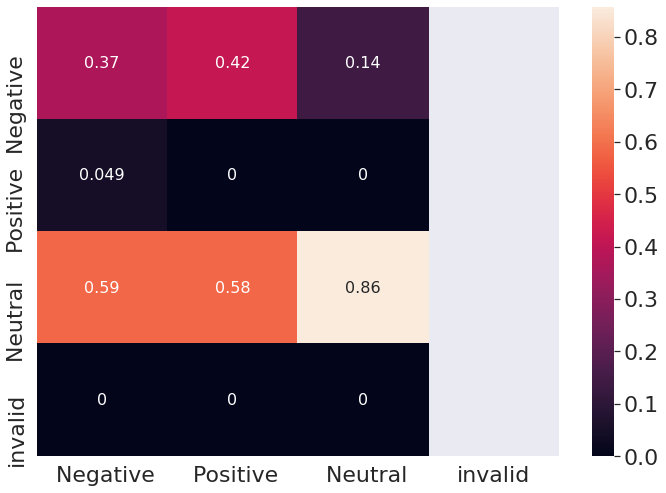

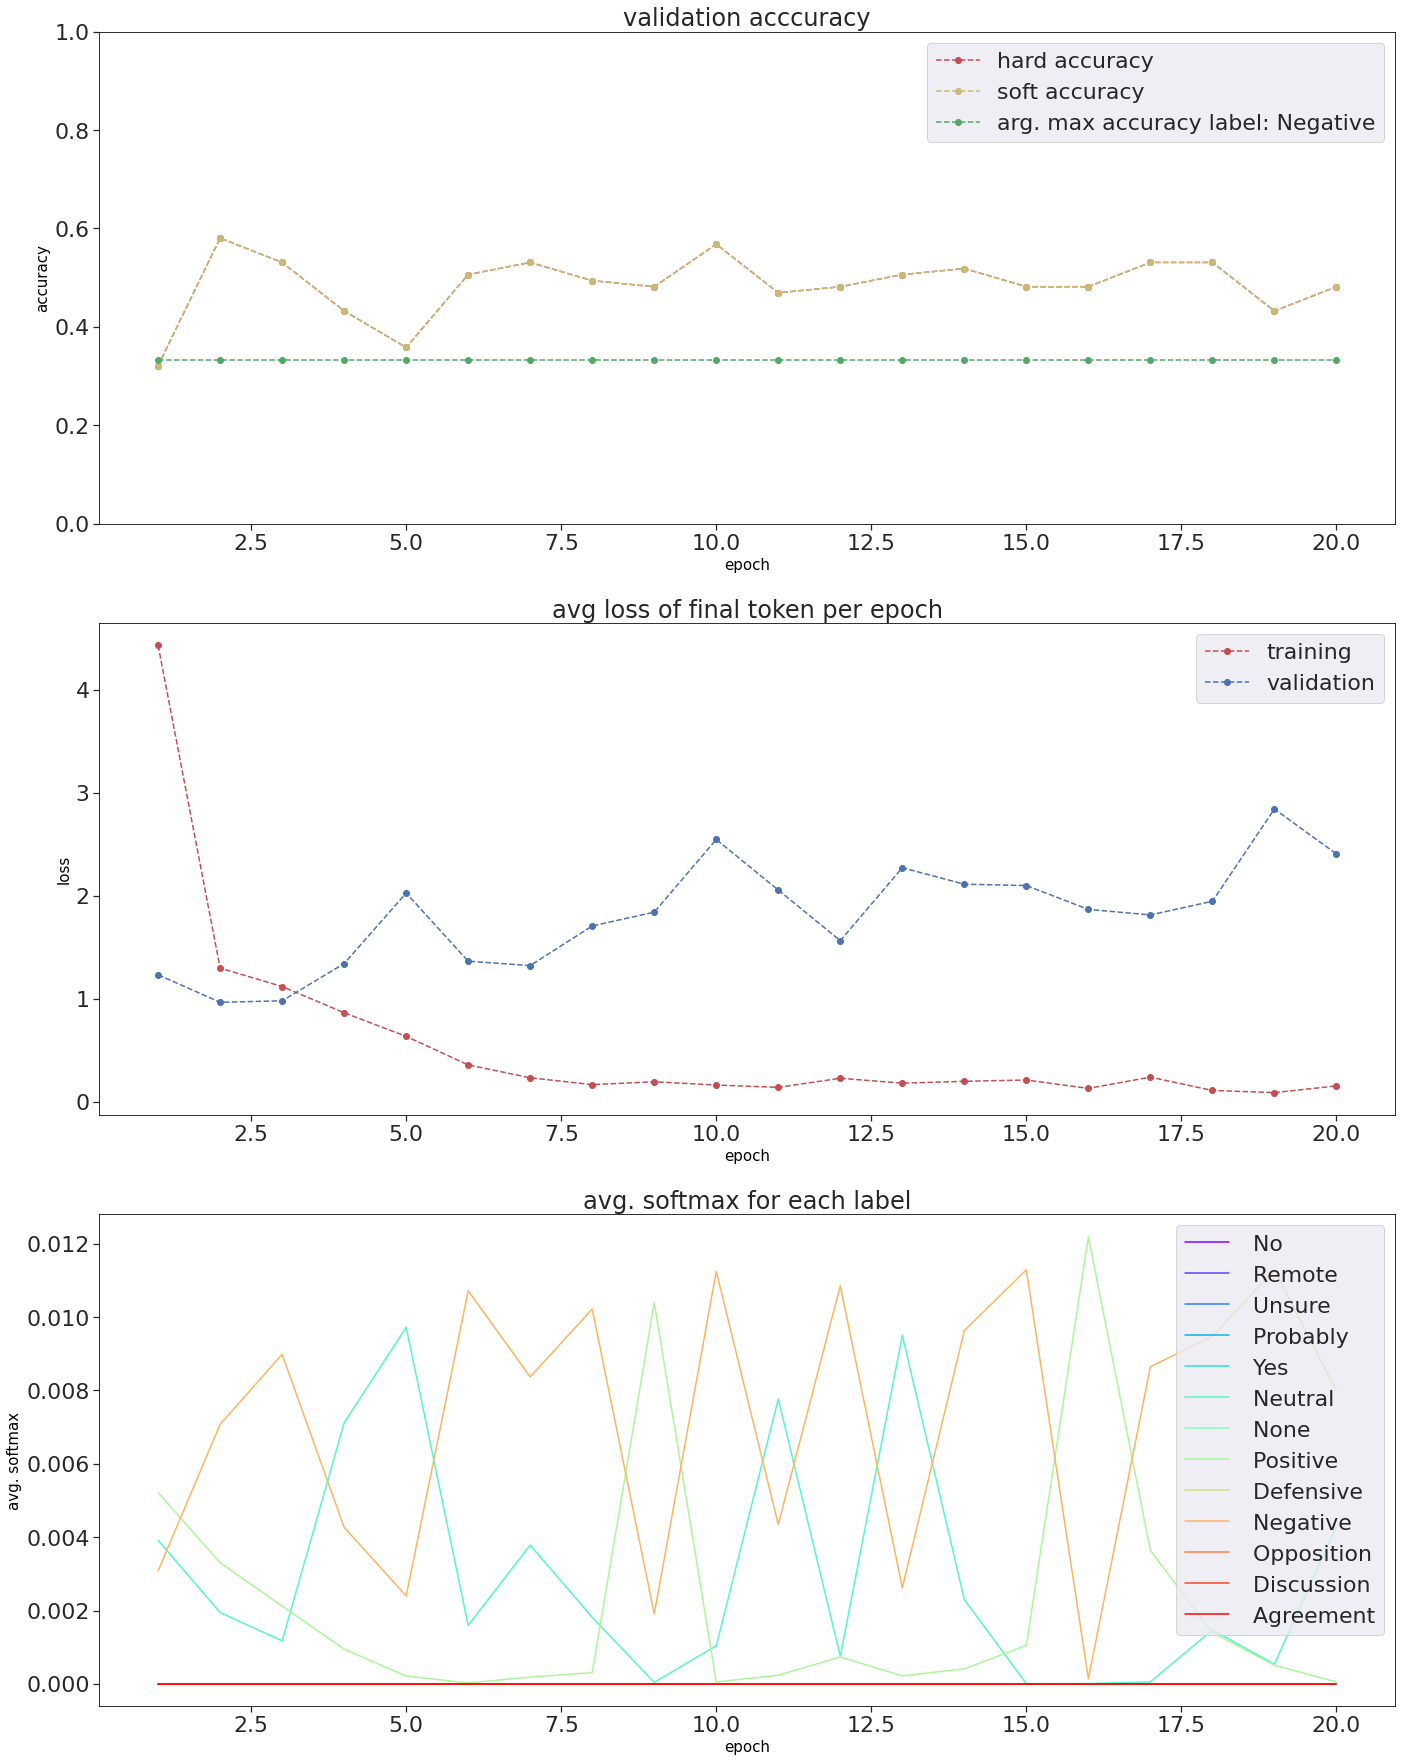

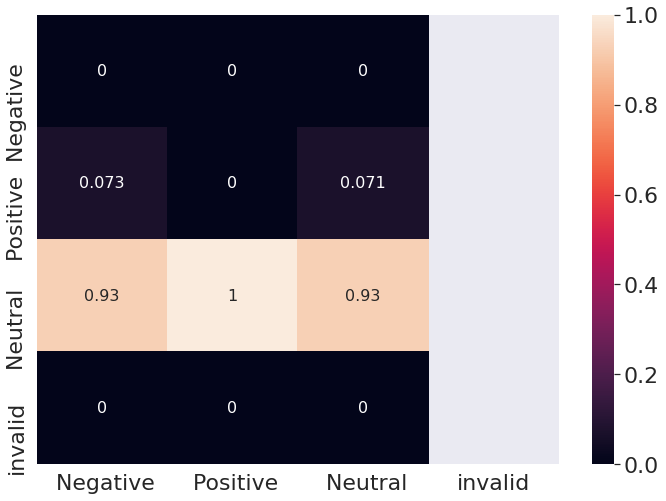

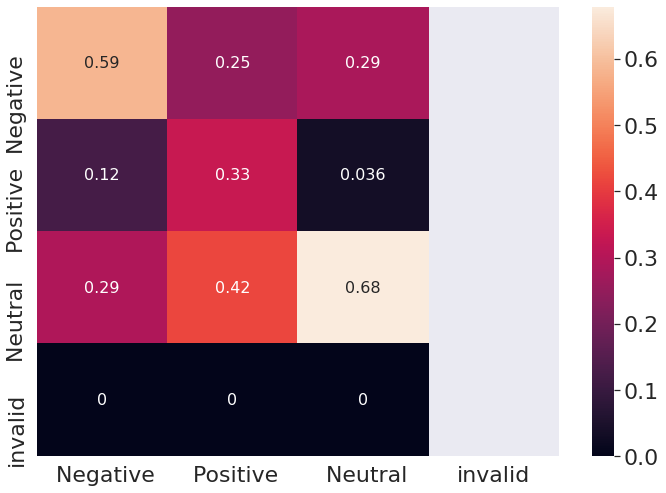

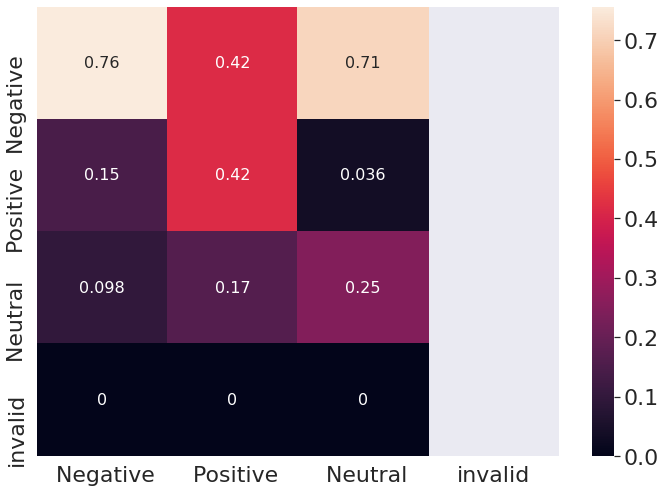

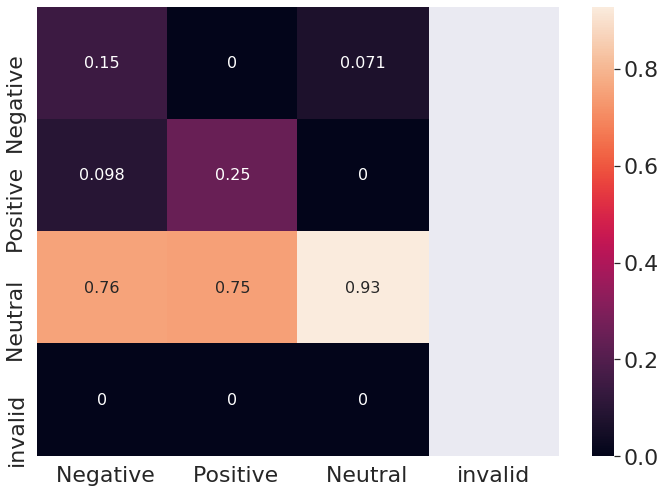

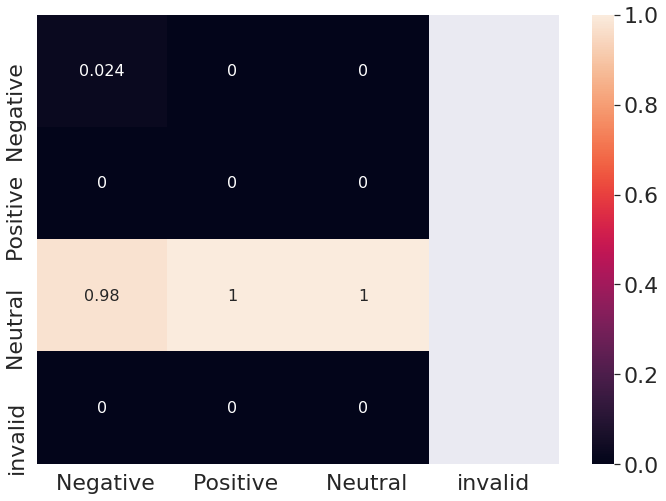

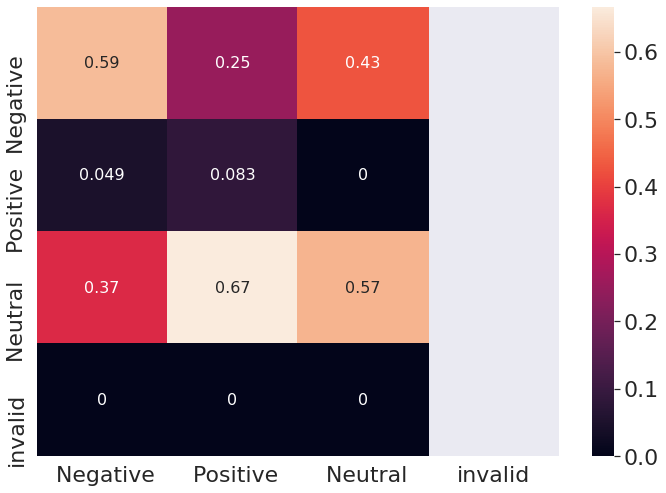

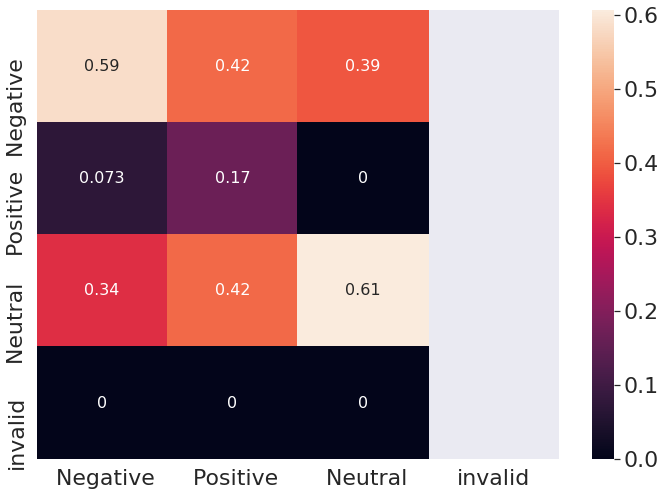

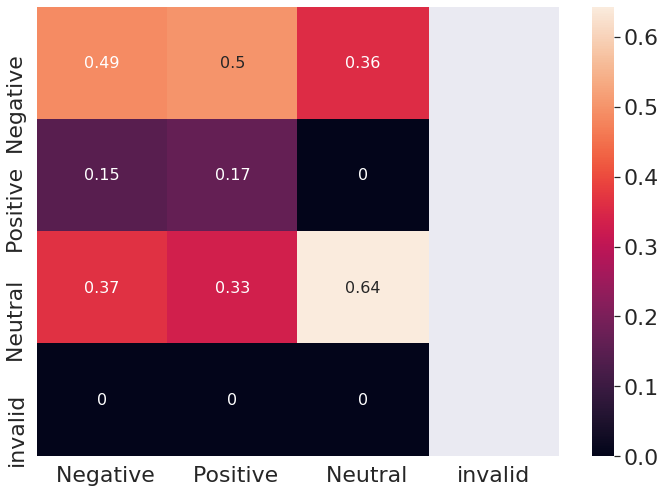

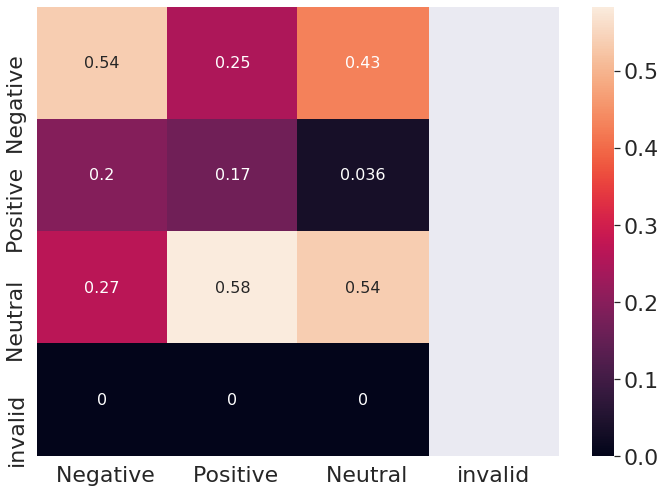

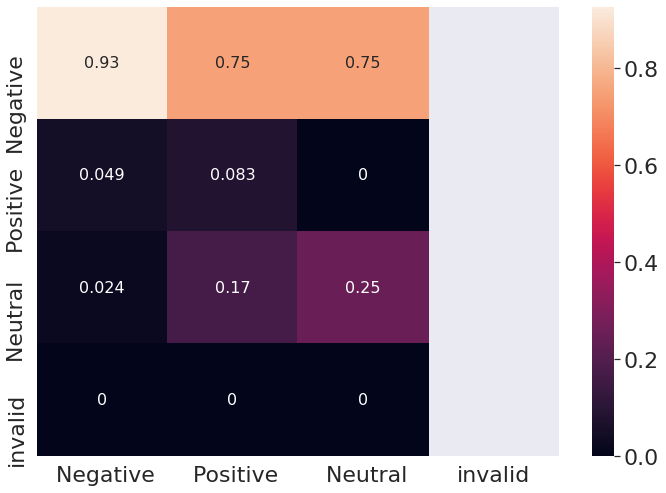

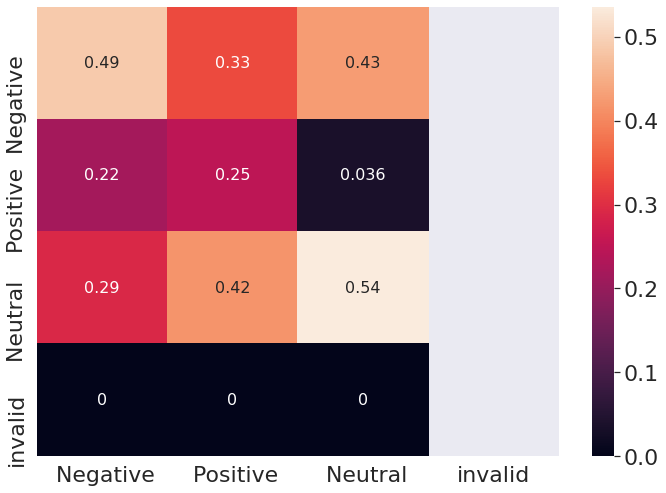

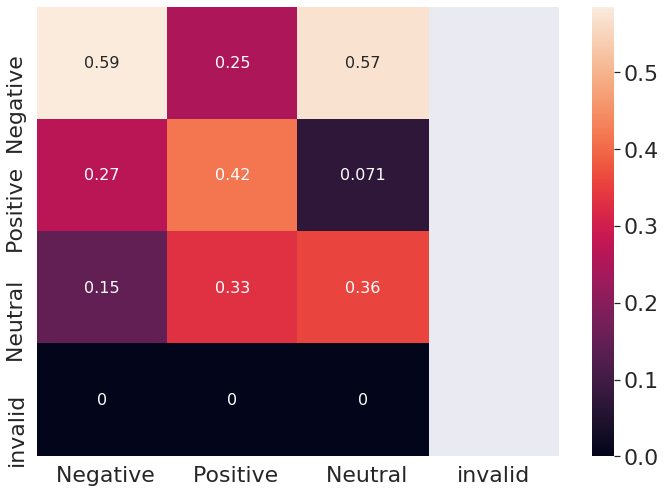

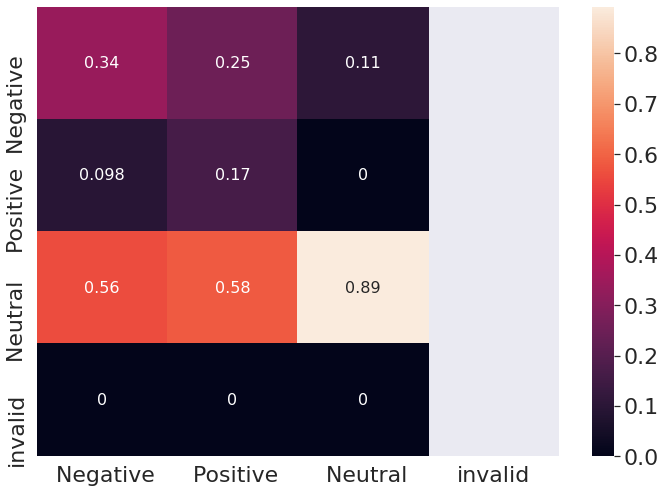

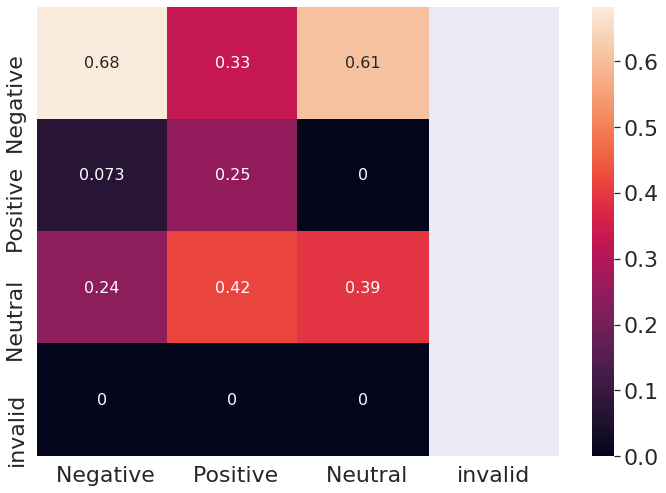

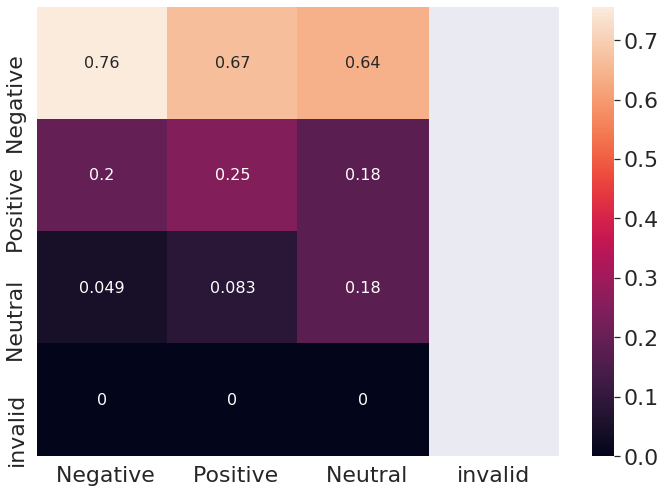

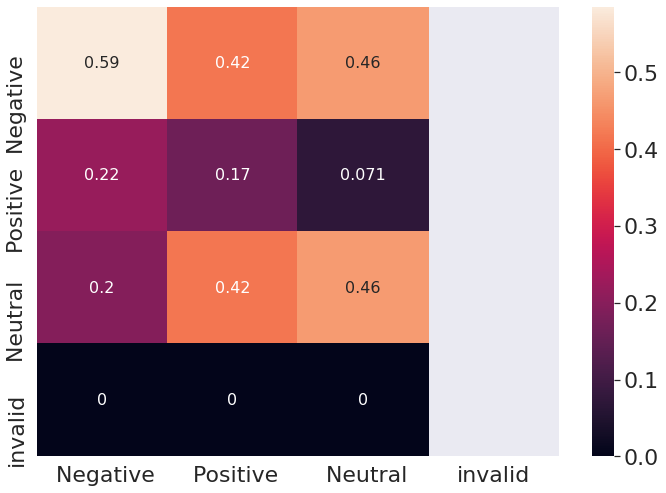

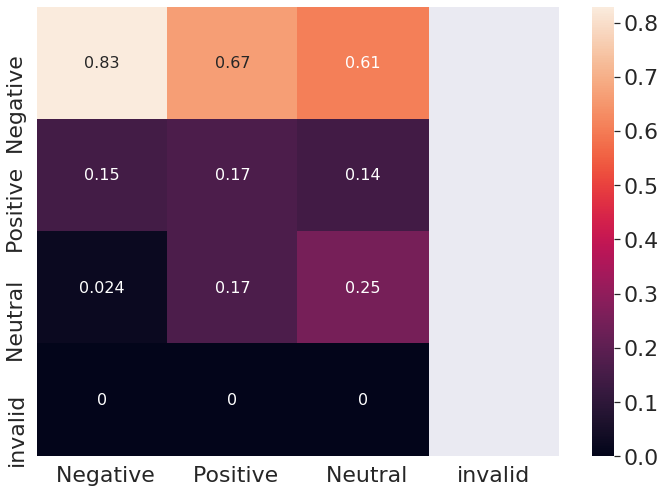

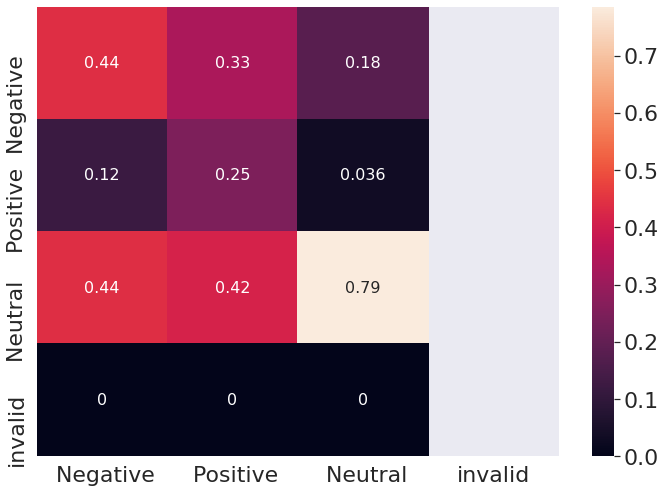

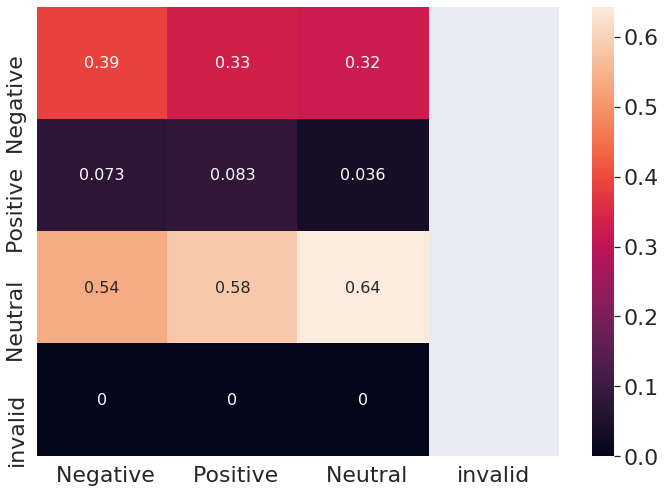

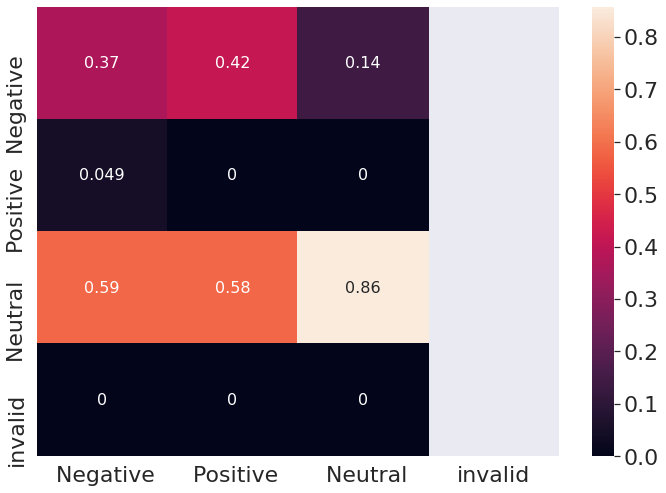

In [ ]:
%matplotlib notebook
%matplotlib inline
import torch
import matplotlib.pyplot as plt
import pandas as pd

pd.options.display.max_rows = 4000
plt.ion()

#medium
#powers = [1/4, 1/2, 1, 2, 4]
powers = [16]
for pow in powers:
  model = train(train_objs,
                "yelp",
                validation_set=templates,
                validation_labels=answers,
                labels_dict=label_dict,
                lr=pow*(2e-5),
                epochs=20,
                batch_size=5,
                gpt2_type="gpt2-medium",
                max_seq_len=1024,
                output_dir="/content/drive/My Drive/projects/multilabel_all_questions/",
                output_prefix=f"gpt2_fintune_3label_fullyballanced_Q2_{pow}",
                save_model_on_epoch=True,
                validation_file=f"Q2_medium_3label_fullyballanced_{pow}")